In [1]:
from statsmodels.datasets import get_rdataset
fisher = get_rdataset('iris')
fisher.data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
import pandas as pd
data = fisher.data
#costruiamo un dataframe vuoto
df = pd.DataFrame()
#inserieamo le prime due feature e chiamiamole X e Y
df['X'] = data['Sepal.Length']
df['Y'] = data['Sepal.Width']
#inseriamo una colonna "C" che contenga le classi
df['C'] = data['Species']

data = df
data.head()

,X,Y,C
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

#dato che il dataset è molto piccolo, prendiamo il 75% dei dati per formare il training set
np.random.seed(134)
data_training, data_test = train_test_split(data,test_size=0.25)

print("Numero di campioni di training:",len(data_training))
print(data_training.head())
print()
print("Numero di campioni di test:",len(data_test))
print(data_test.head())

Numero di campioni di training: 112
       X    Y           C
60   5.0  2.0  versicolor
143  6.8  3.2   virginica
144  6.7  3.3   virginica
127  6.1  3.0   virginica
8    4.4  2.9      setosa

Numero di campioni di test: 38
       X    Y           C
65   6.7  3.1  versicolor
46   5.1  3.8      setosa
99   5.7  2.8  versicolor
101  5.8  2.7   virginica
47   4.6  3.2      setosa


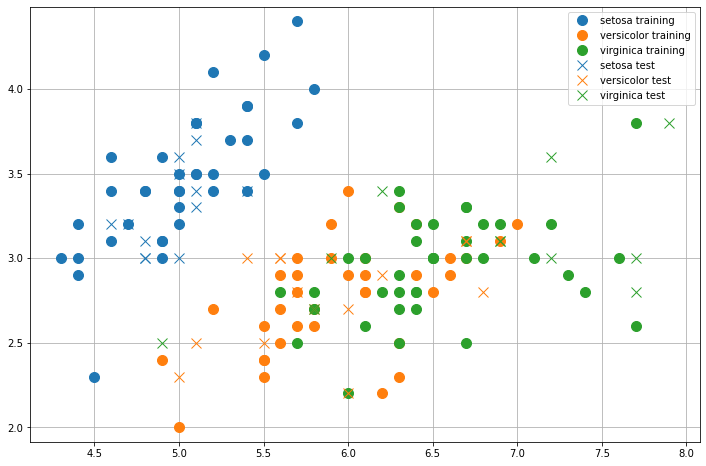

In [4]:
from matplotlib import pyplot as plt
def plot2d(data, label_suffix='', marker='o'):
    classes = sorted(data['C'].unique())
    for c in classes:
        plt.plot(data.where(data['C']==c).dropna().X.values,
                 data.where(data['C']==c).dropna().Y.values,'o', label=c+label_suffix, marker=marker, markersize=10)

    plt.axis('equal')

plt.figure(figsize=(12,8))
plot2d(data_training,' training', marker='o')

#reset dei colori: in questo modo avrò gli stessi colori per training e test set (ripartendo dal blu)
plt.gca().set_prop_cycle(None) 
plot2d(data_test,' test', marker='x')
plt.grid()
plt.legend()
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn_1 = KNN(n_neighbors=1)
knn_1.fit(data_training.drop('C',axis=1), data_training.C)

KNeighborsClassifier(n_neighbors=1)

In [6]:
print("Accuracy sul training set: %0.2f" % knn_1.score(data_training.drop('C',axis=1), data_training.C))
print("Accuracy sul test set: %0.2f" %  knn_1.score(data_test.drop('C',axis=1), data_test.C))

Accuracy sul training set: 0.95
Accuracy sul test set: 0.74


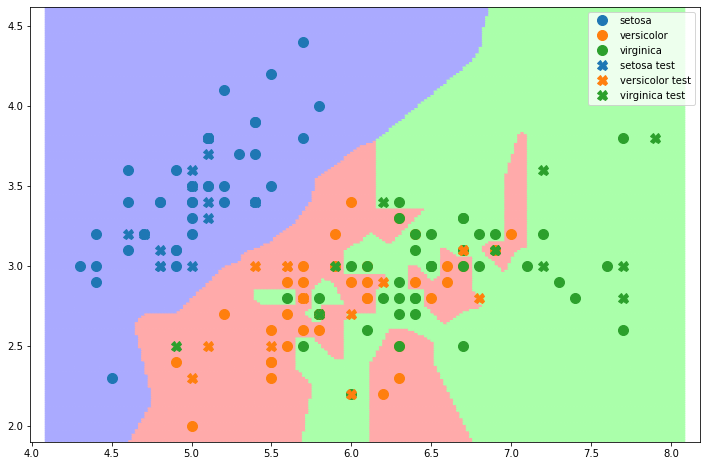

In [7]:
import numpy as np
from matplotlib.colors import ListedColormap
#creiamo una colormap per mostrare le regioni di decisione
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA' ])
import matplotlib.patches as mpatches

def plot_knn_decision_boundary(data, knn):
    plot2d(data)
    X = np.linspace(data['X'].min()*0.95, data['X'].max()*1.05,200)
    Y = np.linspace(data['Y'].min()*0.95, data['Y'].max()*1.05,200)
    X,Y = np.meshgrid(X,Y)
    
    Z = knn.predict(np.c_[X.ravel(), Y.ravel()])
    
    #costruiamo un dizionario per transformare le stringhe in indici
    class_dict = {c:i for i,c in enumerate(knn.classes_)}
    
    Z=list(map(lambda x: class_dict[x],Z))
    Z = np.array(Z).reshape(X.shape)
    
    plt.pcolormesh(X, Y, Z, antialiased=True, cmap=cmap_light)
    #plt.contour(X,Y,Z)

plt.figure(figsize=(12,8))
plot_knn_decision_boundary(data_training,knn_1)
plt.gca().set_prop_cycle(None)
plot2d(data_test,label_suffix=' test', marker='X')
plt.legend()

plt.show()

In [8]:
knn_7 = KNN(n_neighbors=7)
knn_7.fit(data_training.drop('C',axis=1), data_training.C)
print("Accuracy sul training set: %0.2f" % knn_7.score(data_training.drop('C',axis=1), data_training.C))
print("Accuracy sul test set: %0.2f" %  knn_7.score(data_test.drop('C',axis=1), data_test.C))

Accuracy sul training set: 0.84
Accuracy sul test set: 0.82


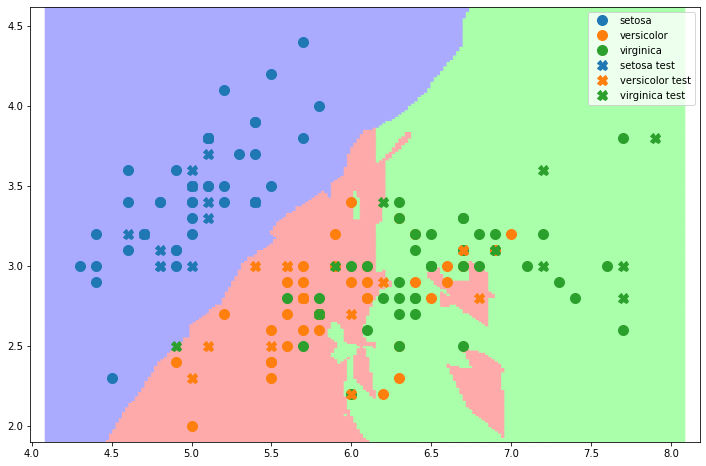

In [9]:
plt.figure(figsize=(12,8))
plot_knn_decision_boundary(data_training,knn_7)
plt.gca().set_prop_cycle(None)
plot2d(data_test,label_suffix=' test', marker='X')
plt.legend()

plt.show()

Migliore accuracy di test: 0.87
Migliore k: 9.00


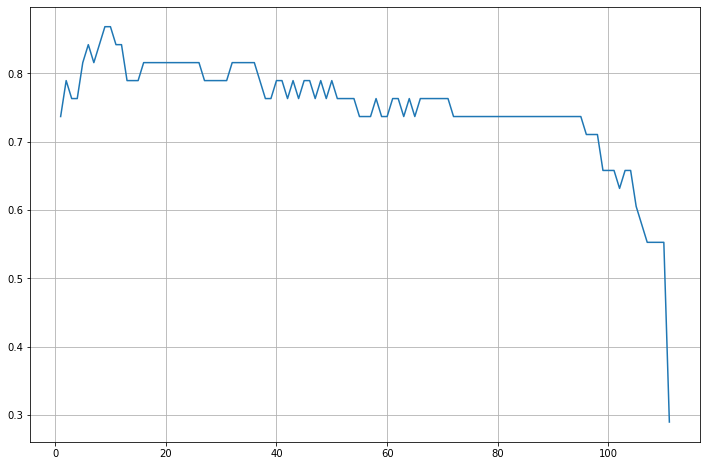

In [10]:
test_accuracies = []
k_values = range(1,len(data_training)) 
for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(data_training.drop('C',axis=1), data_training.C)
    test_accuracies.append(knn.score(data_test.drop('C',axis=1), data_test.C))

best_index = np.argmax(test_accuracies)
best_k = k_values[best_index]
best_accuracy = test_accuracies[best_index]
print("Migliore accuracy di test: %0.2f" % best_accuracy)
print("Migliore k: %0.2f" % best_k)
    
plt.figure(figsize=(12,8))
plt.plot(k_values,test_accuracies)
plt.grid()
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV
#definiamo la griglia di parametri.
param_grid = [ {'n_neighbors':range(1,50)}]
#definiamo l'oggetto Grid Search
gs = GridSearchCV(KNN(), param_grid)
#avviamo la ricerca.
gs.fit(data_training.drop('C',axis=1), data_training.C)
best_knn = gs.best_estimator_
print("Migliore valore di K trovato utilizzando solo il training set: %d" % best_knn.n_neighbors)

Migliore valore di K trovato utilizzando solo il training set: 24


In [12]:
print("Accuracy su test set con miglior K trovato sul training set: %0.2f" % \
        best_knn.score(data_test.drop('C',axis=1), data_test.C))

Accuracy su test set con miglior K trovato sul training set: 0.82


In [13]:
def condense(data, target):
    #utilizzeremo l'array "selected" per tenere traccia dei campioni che sono stati
    #selezionati dall'algoritmo. In particolare, gli indici "i" in corrispondenza dei quali
    #selected[i] è diverso da zero, indicano che data[i] è stato selezionato dall'algoritmo
    #inizializziamo selected con degli zeri. Nessun dato è stato selezionato
    selected = np.zeros(len(data)).astype(bool)
    
    #Step 1: selezioniamo un campione casuale e mettiamolo nell'insieme degli elementi selezionati
    i = np.random.choice(range(len(data))) #scegliamo un indice casuale
    selected[i] = 1
   
    knn = KNN(n_neighbors=1)
    #Step 2: classifichiamo ogni campione non selezionato utilizzando i campioni selezionati come training set
    #ripetiamo la procedura finché non abbiamo più nessun campione da inserire
    finished = False
    while not finished: #finché la variabile finished è False
        #questa variabile ci ricorda se abbiamo inserito nuovi elementi in questa iterazione del while
        selected_new_elements = False
        for i in range(len(data)): #per ogni campione
            if not selected[i]: #se il campione non è stato selezionato
                knn.fit(data[selected],target[selected]) #alleniamo il knn con i campioni selezionati
                if knn.predict(data[i].reshape((1,2)))[0]!=target[i]: #se il campione è stato classificato male
                    selected[i]=1 #selezioniamolo
                    selected_new_elements = True #e indichiamo che abbiamo selezionato almeno un nuovo elemento
        if selected_new_elements == False: #se finito il for non abbiamo selezionato nessun nuovo elemento
            finished=True #allora bbiamo finito
    return data[selected], target[selected] #restituiamo solo i dati che sono stati selezionati

In [14]:
condensed_data, condensed_target = condense(data_training.drop('C',axis=1).values, data_training['C'].values)
data_condensed = pd.DataFrame()
data_condensed['X'] = condensed_data[:,0]
data_condensed['Y'] = condensed_data[:,1]
data_condensed['C'] = condensed_target

print("Numero di campioni nel training set: %d" % len(data_training))
print("Numero di campioni nel training set condensato: %d" % len(data_condensed))
print("Percentuale di dati rimossi: %0.2f" % (float(len(data_training)-len(data_condensed))/len(data_training)*100))

Numero di campioni nel training set: 112
Numero di campioni nel training set condensato: 50
Percentuale di dati rimossi: 55.36


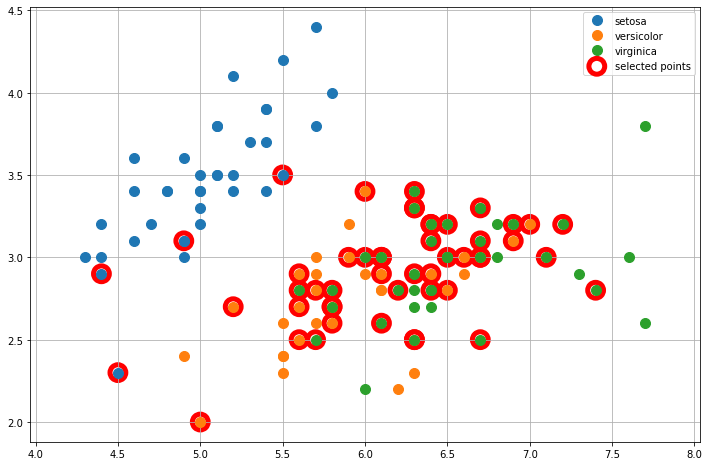

In [15]:
plt.figure(figsize=(12,8))
plot2d(data_training)
plt.scatter(data_condensed.X, data_condensed.Y, 250,
                facecolors='none',edgecolors='r', linewidth=5, label='selected points')
plt.grid()
plt.legend()
plt.show()

In [16]:
knn = KNN(n_neighbors=1)
knn_condensed = KNN(n_neighbors=1)
knn.fit(data_training.drop('C',axis=1), data_training['C'])
knn_condensed.fit(data_condensed.drop('C',axis=1), data_condensed['C'])

print("Accuracy di test per 1-NN su training set originale: %0.2f" % \
    knn.score(data_test.drop('C',axis=1), data_test.C))
print("Accuracy di test per 1-NN su training set condensato: %0.2f" % \
    knn_condensed.score(data_test.drop('C',axis=1), data_test.C))

Accuracy di test per 1-NN su training set originale: 0.74
Accuracy di test per 1-NN su training set condensato: 0.71


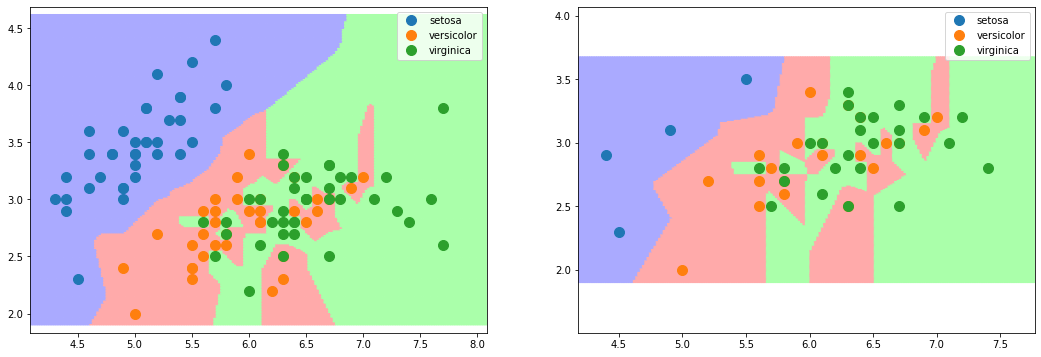

In [17]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plot_knn_decision_boundary(data_training,knn)
plt.legend()
plt.subplot(122)
plot_knn_decision_boundary(data_condensed,knn_condensed)
plt.legend()
plt.show()

In [18]:
def multiedit(data, target, s=5, T=3):
    #L'algoritmo ha due parametri: s e T. Noi scegliamo
    #s=5 (5 split) e T=3 (termina dopo tre iterazione senza errori di classificazione)
    #come parametri di default
    
    #otteniamo una lista di tutti gli indici dei dati
    all_indices = np.array(range(len(data)))
    #finished indica quando abbiamo finito
    finished = False
    #teniamo traccia delle iterazioni passate dall'ultima volta che abbiamo scartato un campione
    iterations_since_last_change = 0
    knn = KNN(n_neighbors=1)
    while not finished:
        #indica se abbiamo modificato il set in questa iterazione
        edited = False
        
        #suddividiamo gli indici in 3 split casuali
        #per far si che gli split siano casuali, prima effettuiamo una permutazione degli indici
        split_indices = np.array_split(np.random.permutation(all_indices),s)
        
        #questa lista conterrà tutti gli indici degli elementi che sono stati classificati male
        #e vanno rimossi
        mark_for_removal = []

        #per ogni split
        for i in range(s):
            #calcoliamo gli indici degli elementi di training e test
            j = (i+1)%s
            idx_test = split_indices[i]
            idx_train = split_indices[j]
            
            #alleniamo il classificatore 1-NN usando gli elementi di training
            knn.fit(data[idx_train],target[idx_train])
            
            #classifichiamo gli elementi di test
            predictions = knn.predict(data[idx_test])
            
            #contrassegnamo per la rimozione tutti gli elementi che sono stati classificati male
            mark_for_removal.extend(idx_test[np.where(predictions!=target[idx_test])])
            
            #se abbiamo classificato male qualche campione, impostiamo edited a True
            if all(predictions!=target[idx_test]):
                edited = True
                
        #rimuoviamo gli indici che avevamo contrassegnato per la rimozione
        all_indices = np.setdiff1d(all_indices, mark_for_removal)
        
        #se non abbiamo modificato il set
        if not edited:
            #incrementiamo il numero di iterazioni dall'ultimo cambiamento
            iterations_since_last_change+=1
            
        #condizione di terminazione
        if iterations_since_last_change>=T:
            finished=True
    
    #restituiamo il nuovo set
    return data[all_indices], target[all_indices]

In [19]:
multiedited_data, multiedited_target = multiedit(data_training.drop('C',axis=1).values, \
                                                 data_training['C'].values)

data_multiedited = pd.DataFrame()
data_multiedited['X'] = multiedited_data[:,0]
data_multiedited['Y'] = multiedited_data[:,1]
data_multiedited['C'] = multiedited_target

In [20]:
knn = KNN(n_neighbors=1)
knn_multiedited = KNN(n_neighbors=1)
knn.fit(data_training.drop('C',axis=1), data_training.C)
knn_multiedited.fit(data_multiedited.drop('C',axis=1), data_multiedited.C)

print("Accuracy di test per 1-NN su training set originale: %0.2f" % \
    knn.score(data_test.drop('C',axis=1), data_test.C))
print("Accuracy di test per 1-NN su training set multieditato: %0.2f" % \
    knn_multiedited.score(data_test.drop('C',axis=1), data_test.C))

Accuracy di test per 1-NN su training set originale: 0.74
Accuracy di test per 1-NN su training set multieditato: 0.79


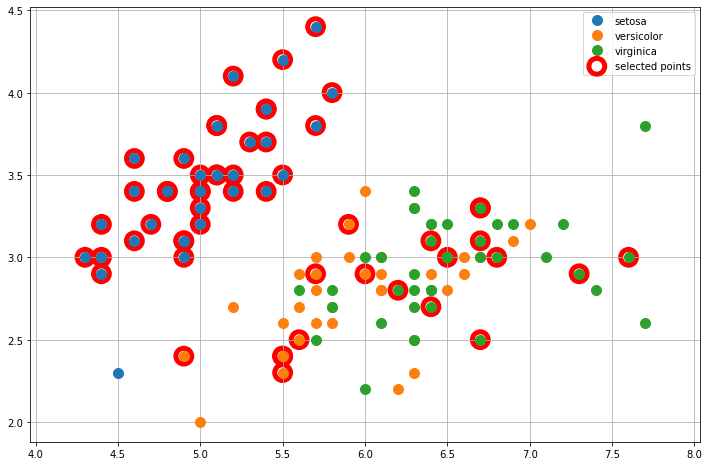

In [21]:
plt.figure(figsize=(12,8))
plot2d(data_training)
plt.scatter(data_multiedited.X, data_multiedited.Y, 250,
                facecolors='none',edgecolors='r', linewidth=5, label='selected points')
plt.grid()
plt.legend()
plt.show()

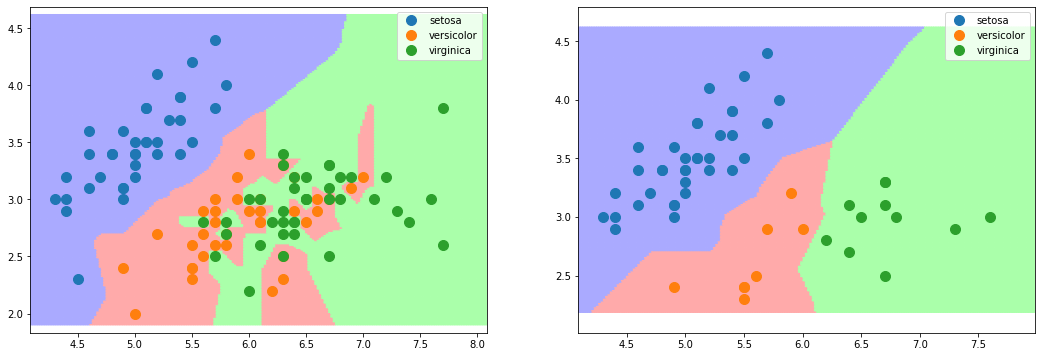

In [22]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plot_knn_decision_boundary(data_training,knn)
plt.legend()
plt.subplot(122)
plot_knn_decision_boundary(data_multiedited,knn_multiedited)
plt.legend()
plt.show()

Numero di campioni nel training set: 112
Numero di campioni nel training set condensato: 50
Percentuale di dati rimossi: 55.36
Accuracy di test per 1-NN su training set multieditato: 0.79
Accuracy di test per 1-NN su training set multieditato e condensato: 0.79


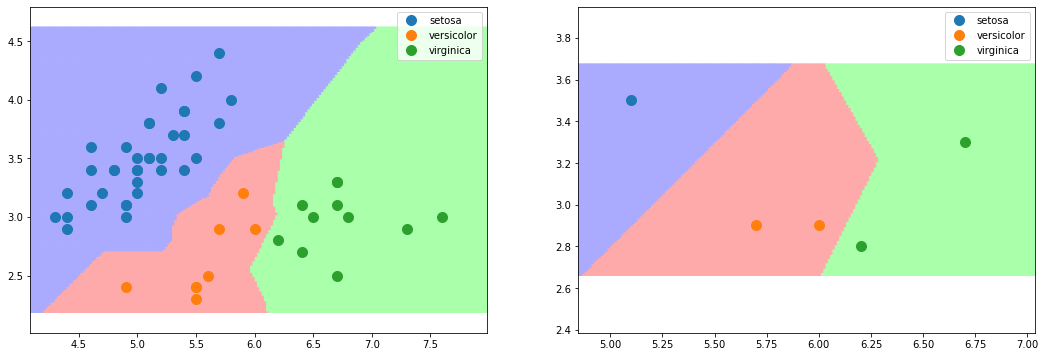

In [23]:
multiedited_condensed_data, multiedited_condensed_target = condense(data_multiedited.drop('C',axis=1).values,\
                                                                    data_multiedited.C.values)
data_multiedited_condensed = pd.DataFrame()
data_multiedited_condensed['X'] = multiedited_condensed_data[:,0]
data_multiedited_condensed['Y'] = multiedited_condensed_data[:,1]
data_multiedited_condensed['C'] = multiedited_condensed_target

print("Numero di campioni nel training set: %d" % len(data_training))
print("Numero di campioni nel training set condensato: %d" % len(data_condensed))
print("Percentuale di dati rimossi: %0.2f" % (float(len(data_training)-len(data_condensed))/len(data_training)*100))

knn_multiedited = KNN(n_neighbors=1)
knn_multiedited_condensed = KNN(n_neighbors=1)
knn_multiedited.fit(data_multiedited.drop('C',axis=1), data_multiedited.C)
knn_multiedited_condensed.fit(data_multiedited_condensed.drop('C',axis=1), data_multiedited_condensed.C)

print("Accuracy di test per 1-NN su training set multieditato: %0.2f" % \
    knn_multiedited.score(data_test.drop('C',axis=1), data_test.C))
print("Accuracy di test per 1-NN su training set multieditato e condensato: %0.2f" % \
    knn_multiedited_condensed.score(data_test.drop('C',axis=1), data_test.C))
    
plt.figure(figsize=(18,6))
plt.subplot(121)
plot_knn_decision_boundary(data_multiedited,knn_multiedited)
plt.legend()
plt.subplot(122)
plot_knn_decision_boundary(data_multiedited_condensed,knn_multiedited_condensed)
plt.legend()
plt.show()

In [24]:
from statsmodels.datasets import get_rdataset
faithful = get_rdataset('faithful')
print("Numero di record:",len(faithful.data))
faithful.data.head()

Numero di record: 272


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


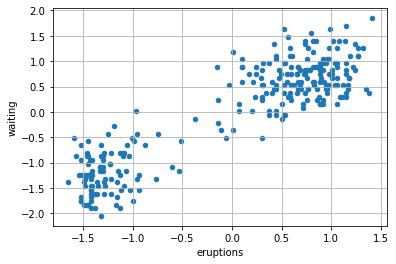

In [25]:
from matplotlib import pyplot as plt
faithful.data = (faithful.data-faithful.data.mean())/faithful.data.std()
#possiamo utilizzare la funzione "plot" dei dataframe o tutti gli altri metodi visti in precedenza
faithful.data.plot(x='eruptions',y='waiting',kind='scatter')
plt.grid()
plt.show()

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(faithful.data)
clusters = kmeans.labels_
print(clusters)

[0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0]


In [28]:
import pandas as pd
data = pd.DataFrame()
data['X'] = faithful.data['eruptions']
data['Y'] = faithful.data['waiting']
data['C'] = clusters.astype(int)
data.head()

,X,Y,C
0,0.098318,0.596025,0
1,-1.478733,-1.242890,1
2,-0.135612,0.228242,0
3,-1.055558,-0.654437,1
4,0.915755,1.037364,0


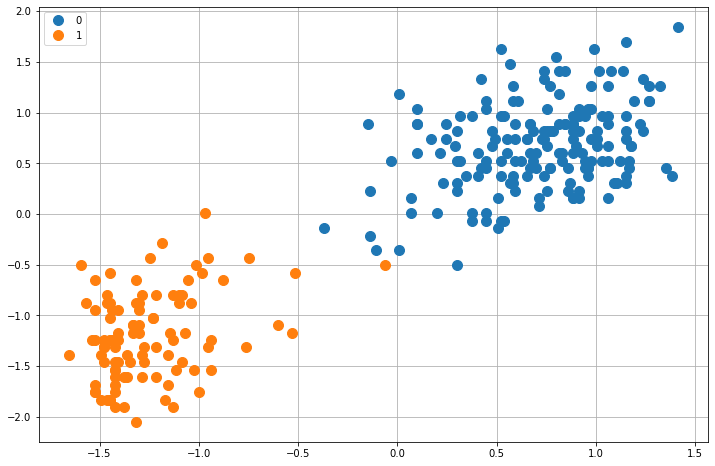

In [29]:
def plot2d(data):
    classes = sorted(data.C.unique())
    for c in classes:
        plt.plot(data.where(data.C==c).dropna().X.values,
                 data.where(data.C==c).dropna().Y.values,'o', markersize=10, label=str(c))

plt.figure(figsize=(12,8))
plot2d(data)
plt.legend()
plt.grid()
plt.show()

In [30]:
kmeans.cluster_centers_

array([[ 0.70839746,  0.67549972],
       [-1.25776692, -1.19935664]])

In [31]:
def plot_kmeans_decision_boundary(data, kmeans):
    plot2d(data)
    X = np.linspace(data.X.min(), data.X.max(),200)
    Y = np.linspace(data.Y.min(), data.Y.max(),200)
    X,Y = np.meshgrid(X,Y)
    
    Z = kmeans.predict(np.c_[X.ravel(), Y.ravel()])
    
    Z = np.array(Z).reshape(X.shape)
    
    plt.pcolormesh(X, Y, Z, antialiased=True, cmap='Set3')
    
    centers = kmeans.cluster_centers_
    
    plt.plot(centers[:,0],centers[:,1],'kX',markersize=10,label='centroids')

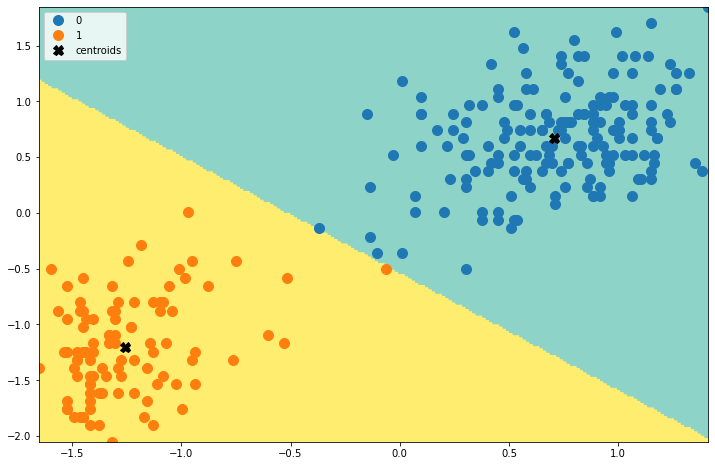

In [32]:
import numpy as np
plt.figure(figsize=(12,8))
plot_kmeans_decision_boundary(data,kmeans)
plt.legend()
plt.show()

In [33]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=4)
gmm.fit(faithful.data)

GaussianMixture(n_components=4)

In [34]:
print("Medie:\n",gmm.means_)
print()
print("Covarianze:\n",gmm.covariances_)
print()
print("Coefficienti:\n",gmm.weights_)

Medie:
 [[ 0.87077316  0.5736336 ]
 [-1.27611228 -1.21071819]
 [ 0.32305313  0.36448737]
 [ 0.79665737  1.09729129]]

Covarianze:
 [[[0.05116849 0.00451385]
  [0.00451385 0.06400531]]

 [[0.05003792 0.02593159]
  [0.02593159 0.18148213]]

 [[0.0973778  0.05875378]
  [0.05875378 0.22812188]]

 [[0.10908528 0.04134389]
  [0.04134389 0.10081797]]]

Coefficienti:
 [0.28621506 0.35373914 0.17873714 0.18130866]


In [35]:
clusters = gmm.predict(faithful.data)
print(clusters)

[2 1 2 1 3 1 3 2 1 3 1 3 0 1 0 1 1 0 1 0 1 1 2 2 0 2 1 0 2 0 0 0 2 2 2 1 1
 0 1 3 0 1 0 1 0 2 2 1 0 1 0 3 1 0 1 0 2 1 0 0 1 3 1 0 1 3 0 0 1 0 3 1 0 2
 1 0 1 0 2 2 0 0 2 1 2 3 2 0 1 3 1 3 1 0 1 0 0 2 1 0 1 3 1 0 2 1 0 1 3 2 0
 1 3 0 1 0 1 3 1 3 1 2 0 1 3 2 1 0 1 3 1 3 1 3 1 0 1 3 1 2 0 1 0 0 0 1 0 1
 3 1 0 2 1 0 2 2 0 3 1 3 1 3 1 2 2 0 1 3 1 3 1 1 0 2 0 0 0 1 3 0 1 0 3 2 1
 0 3 1 0 1 0 1 0 3 2 0 2 0 1 0 1 0 3 1 0 1 0 3 1 0 1 0 1 2 2 0 1 3 1 0 1 0
 1 0 2 0 0 0 2 0 2 1 3 1 3 1 1 0 2 1 0 1 3 2 3 2 1 0 1 0 1 0 2 0 3 2 2 0 1
 0 0 0 1 3 1 1 0 0 1 3 1 0]


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
faithful_gmm = pd.DataFrame()
faithful_gmm['X'] = faithful.data['eruptions']
faithful_gmm['Y'] = faithful.data['waiting']
faithful_gmm['C'] = clusters

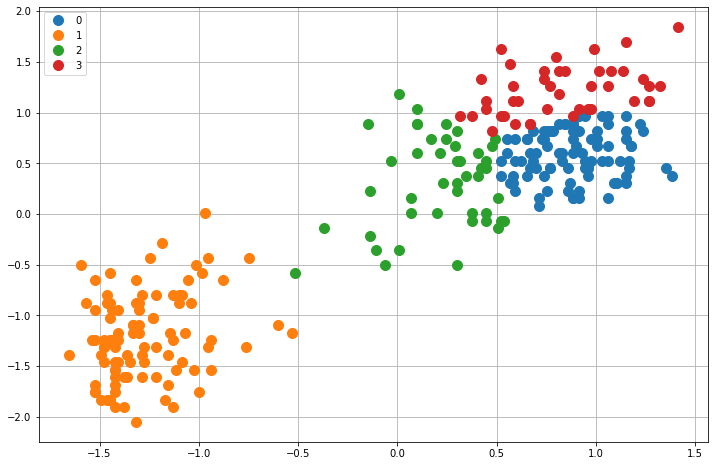

In [37]:
plt.figure(figsize=(12,8))
plot2d(faithful_gmm)
plt.grid()
plt.legend()
plt.show()

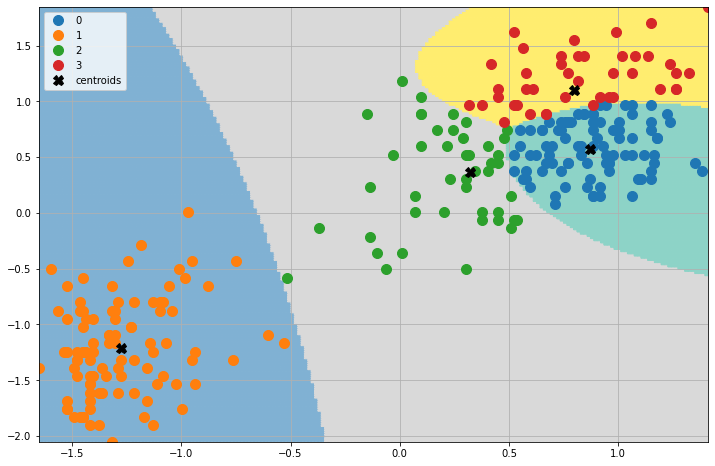

In [38]:
import numpy as np
def plot_gmm_decision_boundary(data, gmm):
    plot2d(data)
    X = np.linspace(data.X.min(), data.X.max(),200)
    Y = np.linspace(data.Y.min(), data.Y.max(),200)
    X,Y = np.meshgrid(X,Y)
    
    Z = gmm.predict(np.c_[X.ravel(), Y.ravel()])
    
    Z = np.array(Z).reshape(X.shape)
    
    plt.pcolormesh(X, Y, Z, antialiased=True, cmap='Set3')
    
    centers = gmm.means_
    
    plt.plot(centers[:,0],centers[:,1],'kX',markersize=10,label='centroids')

plt.figure(figsize=(12,8))
plot_gmm_decision_boundary(faithful_gmm,gmm)
plt.grid()
plt.legend()
plt.show()

(272, 4)
[1.59067299e+00 7.97867716e-08 8.17275427e+01 1.66817842e+01]


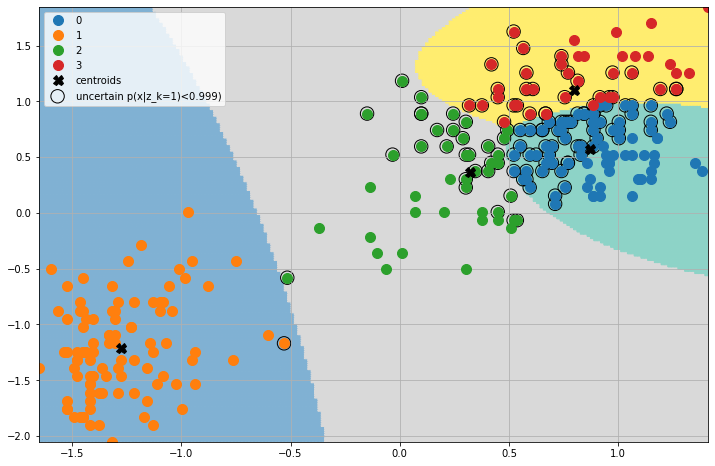

In [41]:
cluster_probabilities = gmm.predict_proba(faithful.data)
print(cluster_probabilities.shape)
print(cluster_probabilities[0]*100)
uncertain = cluster_probabilities.max(1)<0.90 #selezioniamo i punti a probabilità minore di 0.999

plt.figure(figsize=(12,8))
plot_gmm_decision_boundary(faithful_gmm,gmm)
plt.scatter(faithful_gmm['X'].values[uncertain],faithful_gmm['Y'].values[uncertain],180,
                facecolors='none',edgecolors='k', label='uncertain p(x|z_k=1)<0.999)')
plt.grid()
plt.legend()
plt.show()
